In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/Superuser/Downloads/ifood_df_raw.csv')

In [3]:
pd.set_option('display.max_columns', None)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [4]:
df.isnull().sum() # result shows income column has 24 null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [5]:
df.info() #to get info about each column non null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.columns = df.columns.str.replace(' ', '') 
# to remove empty spaces from column names

In [7]:
df['Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype 
--------------  ----- 
2216 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [8]:
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').str.replace('.00','')
# we need to convert income column into float from object, so will
# remove '$' sign ',' and '.00'

In [9]:
ind = df[df['Income'].isna()].index
ind

Index([ 134,  262,  394,  449,  525,  590,  899,  997, 1096, 1185, 1213, 1312,
       1515, 1558, 1693, 1804, 1858, 1863, 1880, 1967, 1983, 2139, 2165, 2170],
      dtype='int64')

In [10]:
df['Income']=df['Income'].astype(float)

In [11]:
df.groupby(['Education'])['Income'].mean() # to remove null values from income we
# find mean of income based on education level, and these values will be inserted
# in respective rows.

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [12]:
ind2=df.loc[ind][(df['Education'] =='PhD')].index
df.loc[ind2, 'Income']= 54549.586279

ind3=df.loc[ind][(df['Education'] =='Master')].index
df.loc[ind3, 'Income']= 51584.452055

ind4=df.loc[ind][(df['Education'] =='Graduation')].index
df.loc[ind4, 'Income']= 50914.849462

ind5=df.loc[ind][(df['Education'] =='2n Cycle')].index
df.loc[ind5, 'Income']= 50914.849462
#replaced all missing values with average income of respective Education group

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1081807563.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind2=df.loc[ind][(df['Education'] =='PhD')].index
C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1081807563.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind3=df.loc[ind][(df['Education'] =='Master')].index
C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1081807563.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind4=df.loc[ind][(df['Education'] =='Graduation')].index
C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1081807563.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind5=df.loc[ind][(df['Education'] =='2n Cycle')].index


In [13]:
df.Income.isnull().sum() # now we have replaced all null values

0

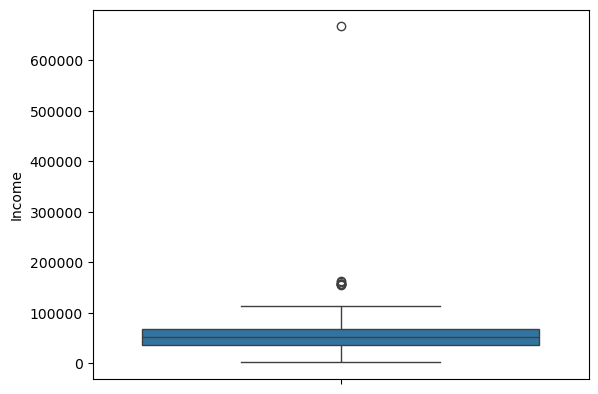

In [14]:
sns.boxplot(y='Income', data =df) 
plt.show()
# to determine outlier, we found that max value
# of income is outlier

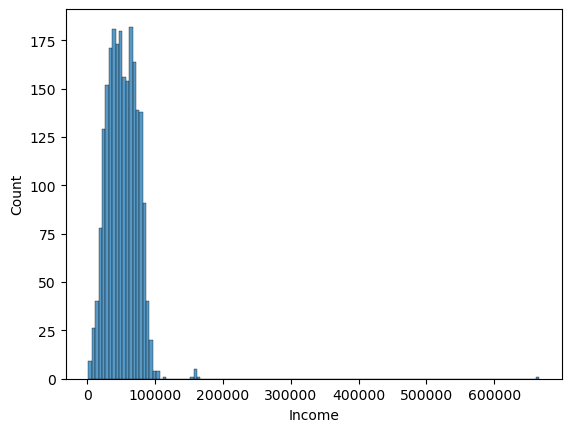

In [15]:
sns.histplot(x='Income', data =df)
plt.show() # to reconfirm results of box plot and it also clearly shows the max 
# value of income is outlier

In [16]:
df[df['Income']==666666.0] # all corresponding values are with in normal range 
# so for now we are not dropping this vaue from original data set, we might drop
# it when analyzing individual correlations

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA


In [17]:
df.nunique() #useful to determine number of categories in category column
# unique function can be used to fetch these unique value

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1977
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [18]:
df.Country.unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [19]:
df.Marital_Status.unique() # for futher analysis we will group them in only 2 categories

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [20]:
df['Age']=2024-df['Year_Birth'] #adding Age column to better understand customers
df['Age']

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2240, dtype: int64

In [21]:
df.Age.describe() # to check data distributin. max, min, mean and std of column

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

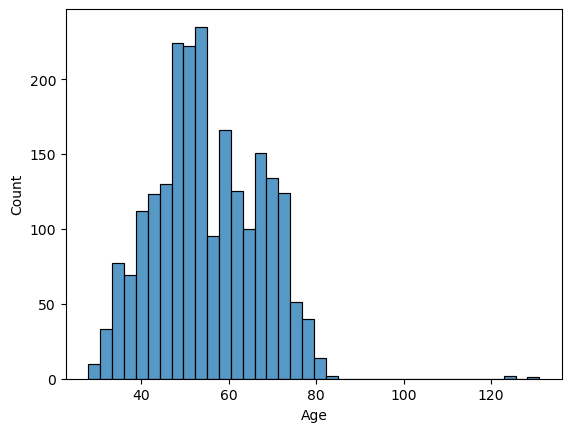

In [22]:
sns.histplot(x='Age', data =df)
plt.xticks(rotation=0)
plt.show()
#visual representation of age ditribution in our data set
# to find outliers in our data

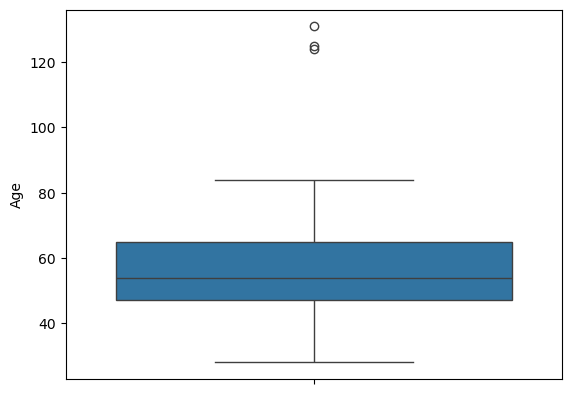

In [23]:
sns.boxplot(y='Age', data =df)
plt.show() 
# to reconfirm outliers in our data

In [24]:
# extreme max age values can be considered as outliers, we can drop these values but for now we are keeping them

In [25]:
df["Age_Category"] = pd.cut(df["Age"], bins = [27,40,54,80,132], labels = ['Millennials','Generation X','Baby_Boomers','Silent Generation'],right = False)
# to convert age into categories
df['Age_Category']

0       Baby_Boomers
1       Baby_Boomers
2       Baby_Boomers
3       Baby_Boomers
4        Millennials
            ...     
2235    Generation X
2236    Generation X
2237    Generation X
2238    Generation X
2239    Baby_Boomers
Name: Age_Category, Length: 2240, dtype: category
Categories (4, object): ['Millennials' < 'Generation X' < 'Baby_Boomers' < 'Silent Generation']

In [26]:
#Adding Variable TotalAmount_Spent for each customer by adding all the Mnt columns

In [27]:
df['Total_Amountspent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [28]:
df['Total_Amountspent'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Amountspent, dtype: float64

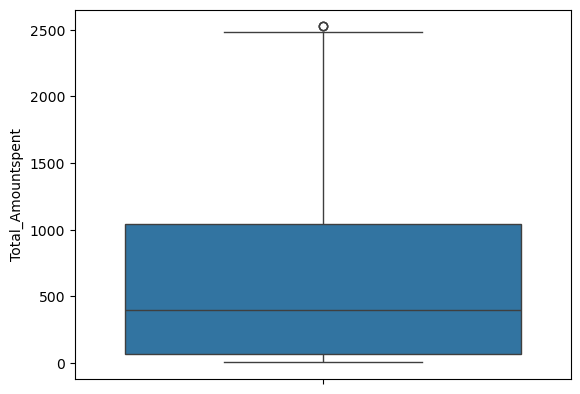

In [29]:
sns.boxplot(y='Total_Amountspent', data =df)
plt.show()

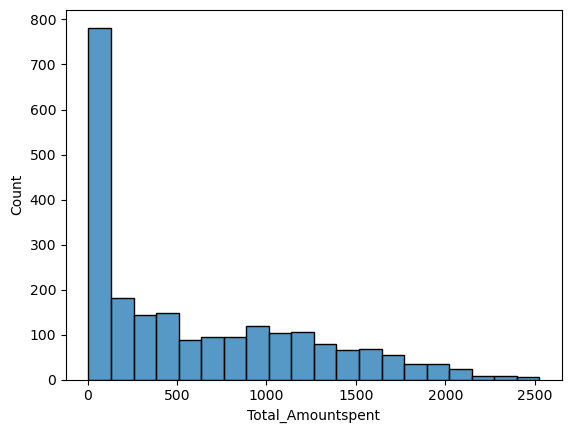

In [30]:
sns.histplot(df['Total_Amountspent'], bins=20, kde=False)  # bins specify the number of bins
plt.show()

In [31]:
# Although number of people decrease significntly as Total amount spent increase, but cant be considered as outlier
# we will further check other column values corresponding to max amount spent

In [32]:
df['Total_Amountspent'].max()

2525

In [33]:
df[df['Total_Amountspent']==2525] # all other values are in normal range so we 
# wont drop values from original data set.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Age_Category,Total_Amountspent
671,5735,1991,Master,Single,90638.0,0,0,2/13/14,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,0,SP,33,Millennials,2525
672,5350,1991,Master,Single,90638.0,0,0,2/13/14,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,1,0,SA,33,Millennials,2525


In [34]:
Amount_each_cat= df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().reset_index()
# to calculate Total sale from each category

In [35]:
sorted_sum = Amount_each_cat.sort_values(0)
sorted_sum.columns = ['Food_category','Total_amount']
sorted_sum
# Result shows revenue generated from fruits is lowest and from wines it is highest

,Food_category,Total_amount
1,MntFruits,58917
4,MntSweetProducts,60621
3,MntFishProducts,84057
5,MntGoldProds,98609
2,MntMeatProducts,373968
0,MntWines,680816


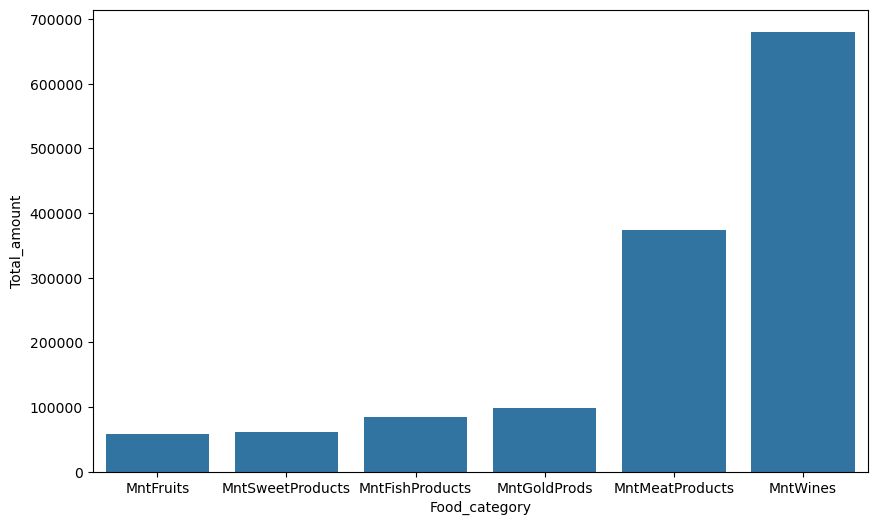

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='Food_category', y='Total_amount', data=sorted_sum )
plt.show()
# to show revenue sales from each category

In [37]:
Amountspent_Total_age = df.groupby(['Age_Category'])['Total_Amountspent'].sum().reset_index().sort_values('Total_Amountspent')
# To calculate total amount spend by each Age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\862501627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Amountspent_Total_age = df.groupby(['Age_Category'])['Total_Amountspent'].sum().reset_index().sort_values('Total_Amountspent')


In [38]:
Amountspent_Total_age
# Result shows most amount spent by baby_boomers and least by silent Generation

,Age_Category,Total_Amountspent
3,Silent Generation,19711
0,Millennials,134622
1,Generation X,441909
2,Baby_Boomers,760746


In [39]:
Age_Category_sorted = Amountspent_Total_age['Age_Category']

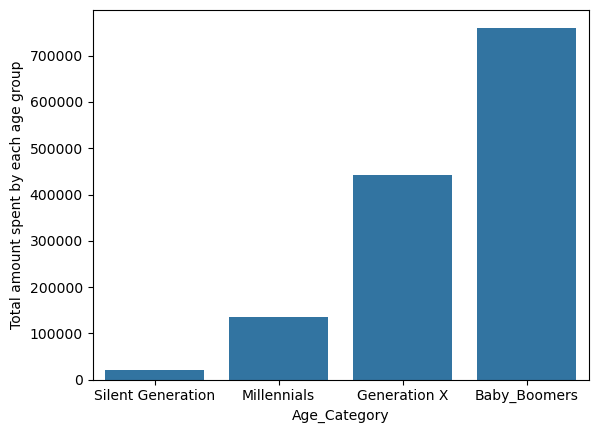

In [40]:
sns.barplot(x='Age_Category', y='Total_Amountspent', data=Amountspent_Total_age, order =Age_Category_sorted)
plt.ylabel('Total amount spent by each age group')
plt.show()
# Results plotted for Total amount spent by each category

In [41]:
ind6=df.loc[(df['Marital_Status'] =='Divorced') | (df['Marital_Status'] =='Single') |(df['Marital_Status'] =='Widow')|(df['Marital_Status'] =='YOLO')|(df['Marital_Status'] =='Alone')|(df['Marital_Status'] =='Absurd')].index
df.loc[ind6, 'Marital_Status']= 0
ind7=df.loc[(df['Marital_Status'] =='Married')|(df['Marital_Status'] =='Together')].index
df.loc[ind7, 'Marital_Status']= 1
# assigning 0 value to single, widow, divorced, alone,absurd, yolo
# assigning 1 to married and living together

In [42]:
df['Marital_Status'].unique() # so we have only two marital _status

array([0, 1], dtype=object)

In [43]:
Amountspent_Total_age_gender = df.groupby(['Age_Category','Marital_Status'])['Total_Amountspent'].sum().reset_index()
# to check impact of marital status on Total spending by each Age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\409163240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Amountspent_Total_age_gender = df.groupby(['Age_Category','Marital_Status'])['Total_Amountspent'].sum().reset_index()


In [44]:
Amountspent_Total_age_gender.sort_values('Total_Amountspent')
# Result shows single person in silent Generation spent the least and, Married person
# from Boomers generation spent the most amount, general trend is in each category that single people
# spent less Total amount

,Age_Category,Marital_Status,Total_Amountspent
6,Silent Generation,0,8522
7,Silent Generation,1,11189
0,Millennials,0,63117
1,Millennials,1,71505
2,Generation X,0,135253
4,Baby_Boomers,0,286778
3,Generation X,1,306656
5,Baby_Boomers,1,473968


In [45]:
 Sorted_Amount = Amountspent_Total_age_gender.sort_values('Total_Amountspent')

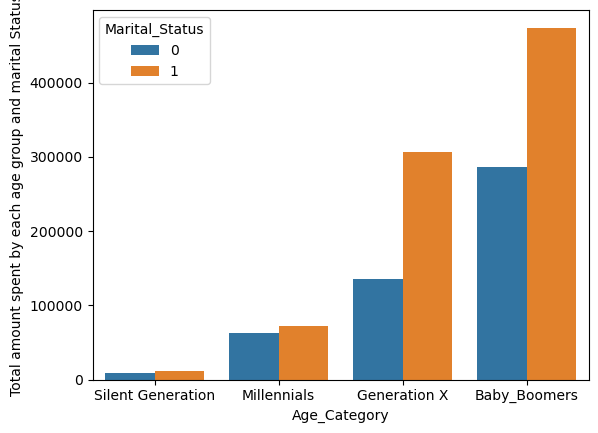

In [46]:
sns.barplot(x='Age_Category', y='Total_Amountspent',hue= 'Marital_Status', data=Sorted_Amount, order =Sorted_Amount.Age_Category.values.unique())
plt.ylabel('Total amount spent by each age group and marital Status')
plt.show()
# Graph to show impact of marital status on Total Spending

In [47]:
### Now we will calculate Average spending for each Age category, and also explore 
### impact of marital status on average Spending

In [48]:
Amountspent_Average = df.groupby(['Age_Category'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')
# Average amount spent by each age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1991020339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Amountspent_Average = df.groupby(['Age_Category'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')


In [49]:
Amountspent_Average
##Results are way different than total spending, Silent Generation which spend 
## the least amount in total have highest average spending. Also millennials average
## spending is more than Genration X while the result was opppsite in case of Total spending

,Age_Category,Total_Amountspent
1,Generation X,510.287529
0,Millennials,609.149321
2,Baby_Boomers,670.851852
3,Silent Generation,1037.421053


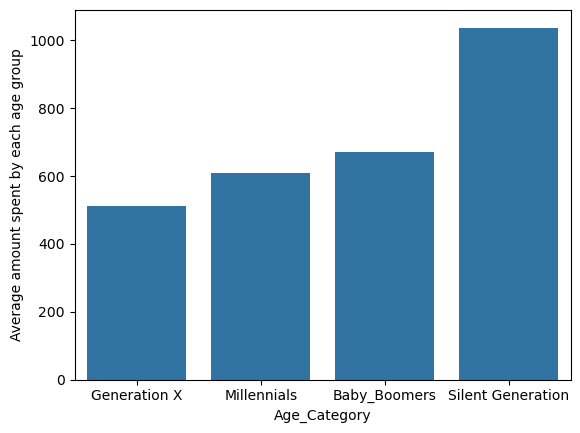

In [50]:
gen_cat= Amountspent_Average.Age_Category.values
sns.barplot(x='Age_Category', y='Total_Amountspent', data=Amountspent_Average, order =gen_cat)
plt.ylabel('Average amount spent by each age group')
plt.show()
# plot which clearly shows Silent Generation Average buying is highest

In [51]:
Amountspent_Average_Age_Gender = df.groupby(['Age_Category','Marital_Status'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')
# to check impact of marital status on Total spending by each Age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\2505988028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Amountspent_Average_Age_Gender = df.groupby(['Age_Category','Marital_Status'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')


In [52]:
Amountspent_Average_Age_Gender
# These results are very interesting and donot follow the expected trend, Singles in both millenials
## and Boomers  are spending more on average, while Gen X spending is almost same
## only Silent Generation followed the expected trend.

,Age_Category,Marital_Status,Total_Amountspent
2,Generation X,0,504.675373
3,Generation X,1,512.802676
1,Millennials,1,590.950413
0,Millennials,0,631.170000
5,Baby_Boomers,1,661.043236
4,Baby_Boomers,0,687.717026
6,Silent Generation,0,774.727273
7,Silent Generation,1,1398.625000


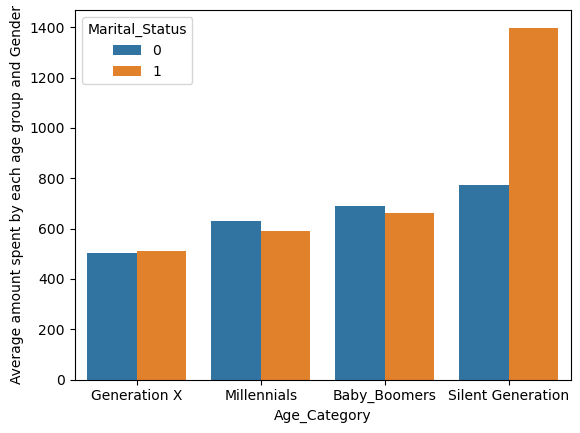

In [53]:
Gen_cat=Amountspent_Average_Age_Gender.Age_Category.values.unique()
sns.barplot(x='Age_Category', y='Total_Amountspent',hue='Marital_Status', data=Amountspent_Average_Age_Gender, order =Gen_cat)
plt.ylabel('Average amount spent by each age group and Gender')
plt.show()
# plot to show impact of Marita status on average spending by each age group

In [54]:
### Now we will see total spending by each country

In [55]:
Amountspent_Total_country=df.groupby(['Country'])['Total_Amountspent'].sum().reset_index().sort_values('Total_Amountspent')

In [56]:
Amountspent_Total_country
# Result shows ME spent the least amount and sp spent the most amount

,Country,Total_Amountspent
4,ME,3122
7,US,67882
2,GER,74913
3,IND,79485
0,AUS,89763
1,CA,168532
5,SA,211071
6,SP,662220


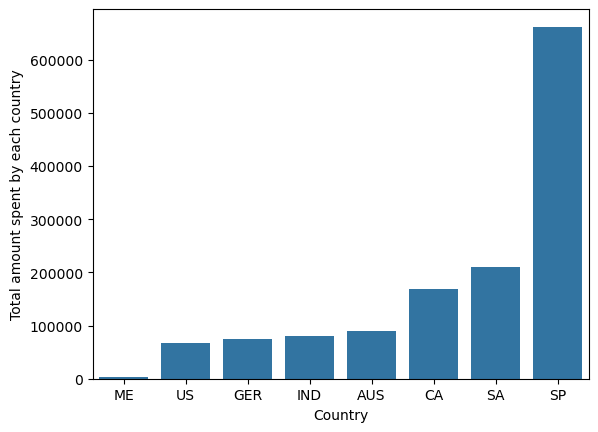

In [57]:
sns.barplot(x='Country', y='Total_Amountspent', data=Amountspent_Total_country)
plt.ylabel('Total amount spent by each country')
plt.show()
#plot showing Total amount spent by each country 

In [58]:
### Now we will see average spending by each country

In [59]:
Amountspent_Average_country = df.groupby(['Country'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')

In [60]:
Amountspent_Average_country
# again results are different when it comes to average spendng, now ME is leading
## while IND is lowest, It means ME is also important market which should not 
## be ignored based on total spending

,Country,Total_Amountspent
3,IND,537.060811
0,AUS,561.018750
6,SP,604.767123
7,US,622.770642
2,GER,624.275000
5,SA,626.323442
1,CA,628.850746
4,ME,1040.666667


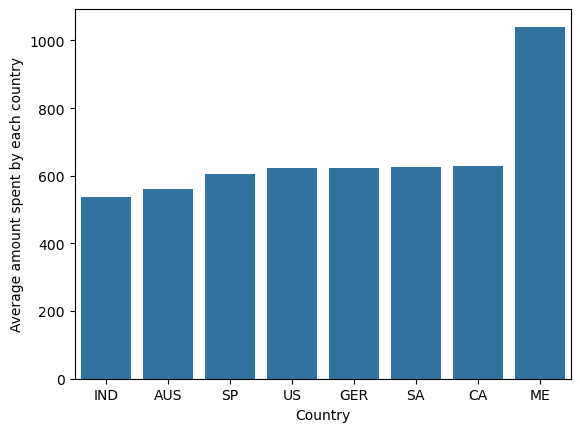

In [61]:
sns.barplot(x='Country', y='Total_Amountspent', data=Amountspent_Average_country)
plt.ylabel('Average amount spent by each country')
plt.show()
# Plot showing average spending by each country

In [62]:
# Adding new column Total_Purchases by adding all purchase columns

In [63]:
df['Total_purchase']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases']

In [64]:
df.Total_purchase.describe() ## to check mean , min and max values

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchase, dtype: float64

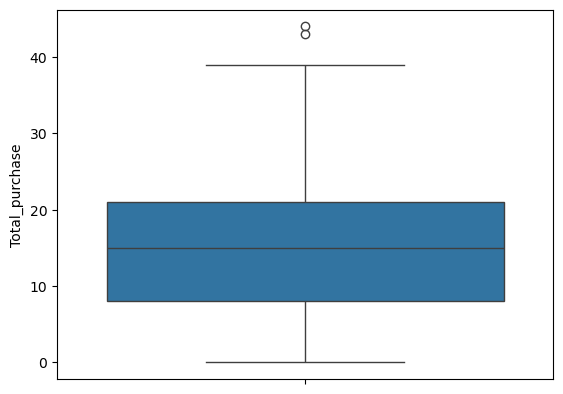

In [65]:
sns.boxplot(y='Total_purchase', data =df)
plt.show() # result shows top max values might be outlier

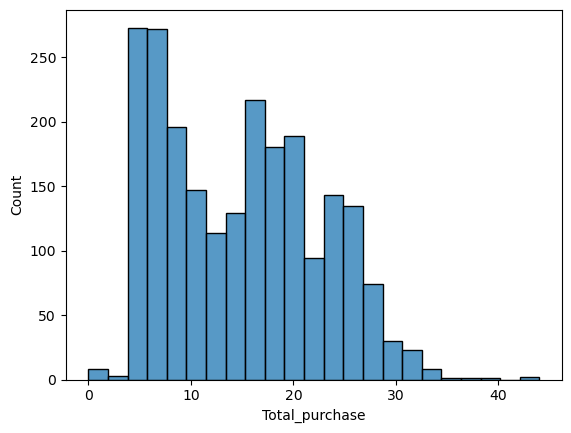

In [66]:
sns.histplot(x='Total_purchase', data =df)
plt.show() #to confirm result from Box plot

In [67]:
df.Total_purchase.max() # to check max value

44

In [68]:
df[df['Total_purchase']==44] # other results are with in range thats why did not remove this value

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Age_Category,Total_Amountspent,Total_purchase
497,1501,1982,PhD,1,160803.0,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,42,Generation X,1717,44


In [69]:
Total_Purchase_age = df.groupby(['Age_Category'])['Total_purchase'].sum().reset_index().sort_values('Total_purchase')
## Total purchase by each Age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\898315151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_Purchase_age = df.groupby(['Age_Category'])['Total_purchase'].sum().reset_index().sort_values('Total_purchase')


In [70]:
Total_Purchase_age
# Result shows silent Generation made the least purchases while Baby_ boomers made the most
## same trend as in Total Amount spent which is understandable

,Age_Category,Total_purchase
3,Silent Generation,350
0,Millennials,2882
1,Generation X,11826
2,Baby_Boomers,18233


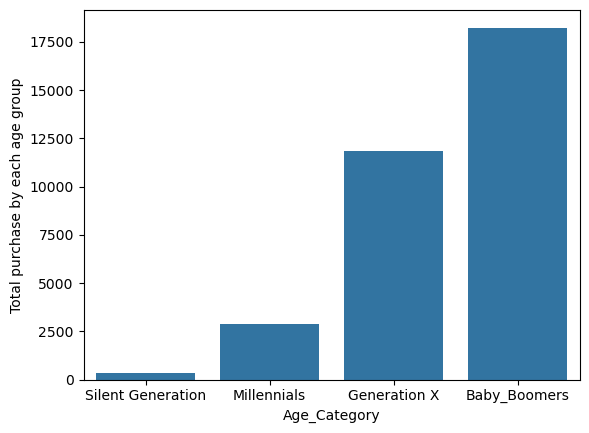

In [71]:
Gen_Cat = Total_Purchase_age.Age_Category.values
sns.barplot(x='Age_Category', y='Total_purchase', data=Total_Purchase_age, order =Gen_Cat )
plt.ylabel('Total purchase by each age group')
plt.show()
# Plot to show purchase by each category

In [72]:
Avg_Purchase_age = df.groupby(['Age_Category'])['Total_purchase'].mean().reset_index()
## Now we will check Average purchase by each Age category

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\2440592014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_Purchase_age = df.groupby(['Age_Category'])['Total_purchase'].mean().reset_index()


In [73]:
Avg_Purchase_age
## Again results are different when it comes to average, Silent Generation who made 
## the less total purchases is leading on average purchases.

,Age_Category,Total_purchase
0,Millennials,13.040724
1,Generation X,13.655889
2,Baby_Boomers,16.078483
3,Silent Generation,18.421053


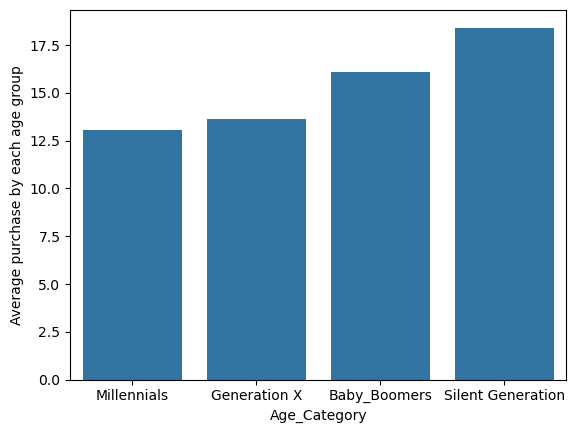

In [74]:
sns.barplot(x='Age_Category', y='Total_purchase', data=Avg_Purchase_age)
plt.ylabel('Average purchase by each age group')
plt.show()
## Average purchases by each category plot

In [75]:
Total_Purchase_country = df.groupby(['Country'])['Total_purchase'].sum().reset_index().sort_values('Total_purchase')
## Now we will check total purchase by each Country

In [76]:
Total_Purchase_country
# Result shows ME made fewer purchases and SP made highest

,Country,Total_purchase
4,ME,59
7,US,1761
2,GER,1788
3,IND,2099
0,AUS,2314
1,CA,4101
5,SA,5117
6,SP,16052


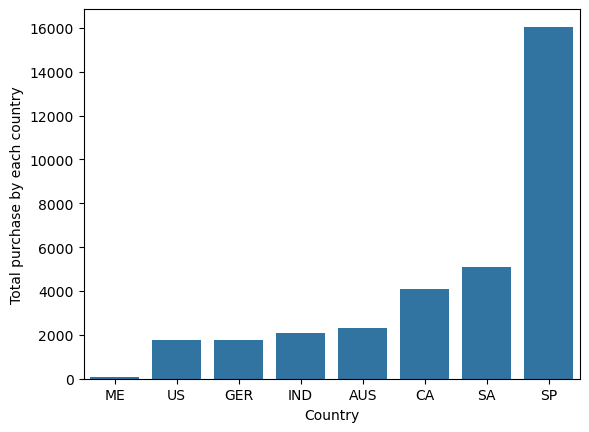

In [77]:
sns.barplot(x='Country', y='Total_purchase', data=Total_Purchase_country)
plt.ylabel('Total purchase by each country')
plt.show()
## Total purchase by each country

In [78]:
Avg_Purchase_country = df.groupby(['Country'])['Total_purchase'].mean().reset_index().sort_values('Total_purchase')
## Now we will check Average purchase by each Country

In [79]:
Avg_Purchase_country
# Result shows in India average purchases are lowest and in Me they are highest

,Country,Total_purchase
3,IND,14.182432
0,AUS,14.462500
6,SP,14.659361
2,GER,14.900000
5,SA,15.183976
1,CA,15.302239
7,US,16.155963
4,ME,19.666667


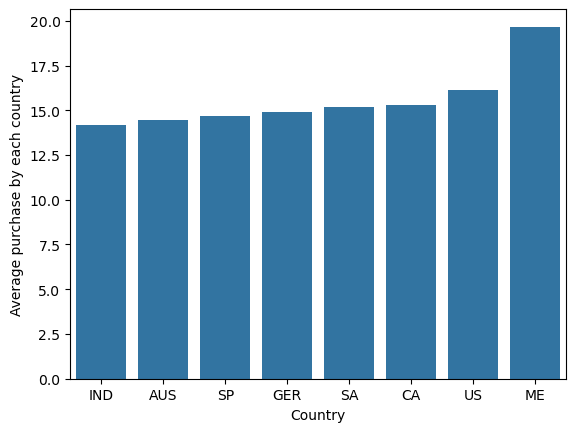

In [80]:
sns.barplot(x='Country', y='Total_purchase', data=Avg_Purchase_country)
plt.ylabel('Average purchase by each country')
plt.show()
# Avergar purchase by country plot

In [81]:
## to see impact of Total family members on Average amount spent we are adding 1 more column
df['Family']=df['Kidhome']+df['Teenhome']+df['Marital_Status']

In [82]:
df['Family']= df['Family'].astype('int64')

In [83]:
Avg_Totalamount_Family= df.groupby(['Family'])['Total_Amountspent'].mean().reset_index().sort_values('Total_Amountspent')

In [84]:
Avg_Totalamount_Family
# Results are surprising, household with single person are spending more while
## people with 3 to 4 members are spending less

,Family,Total_Amountspent
3,3,248.847176
4,4,308.531250
2,2,440.573678
1,1,785.039267
0,0,1105.401575


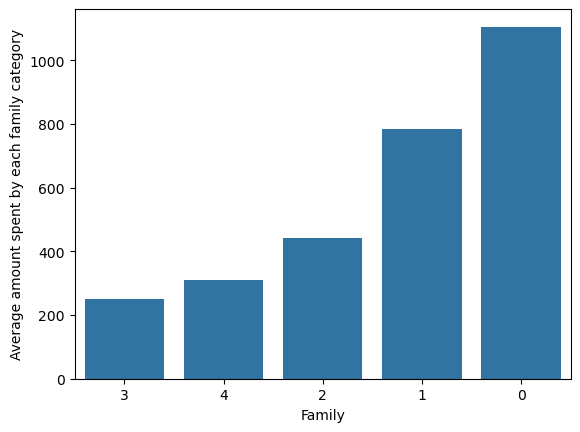

In [85]:
Purchase_order1=Avg_Totalamount_Family.Family.values
sns.barplot(x='Family', y='Total_Amountspent', data=Avg_Totalamount_Family, order = Purchase_order1)
plt.ylabel('Average amount spent by each family category')
plt.show()

In [86]:
## to see impact of Total family members on Average purchases spent we are adding 1 more column

Avg_Purchase_Family= df.groupby(['Family'])['Total_purchase'].mean().reset_index().sort_values('Total_purchase')

In [87]:
Avg_Purchase_Family
# Average purchases made by single people is more than married with kids/teens

,Family,Total_purchase
3,3,12.398671
4,4,12.437500
2,2,14.068616
1,1,15.941099
0,0,17.618110


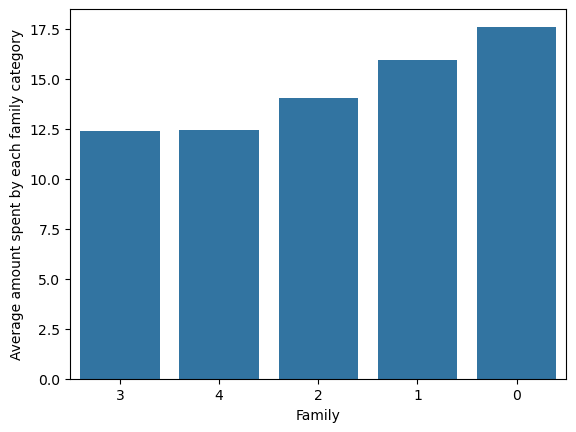

In [88]:
Purchase_order = Avg_Purchase_Family.Family.values
sns.barplot(x='Family', y='Total_purchase', data=Avg_Purchase_Family, order =Purchase_order)
plt.ylabel('Average amount spent by each family category')
plt.show()

Now we will explore correlation between different Numerical features

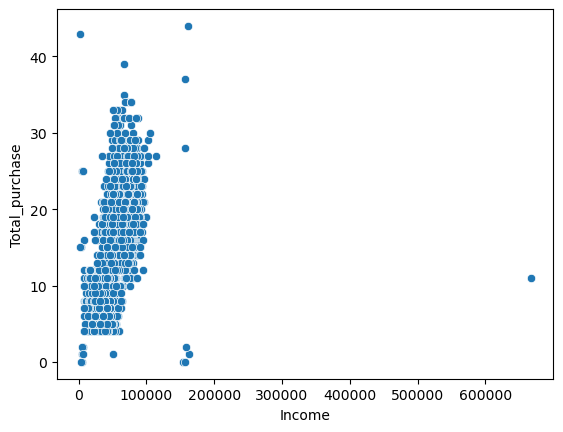

In [89]:
## plot between Total purchase and income
sns.scatterplot(x='Income', y='Total_purchase', data =df)
plt.show()

In [90]:
# as we can see plot shape is changed because of outliers we will drop outliers to understand correlation better

In [91]:
df_new= df.drop(df[df['Income'] > 120000].index)

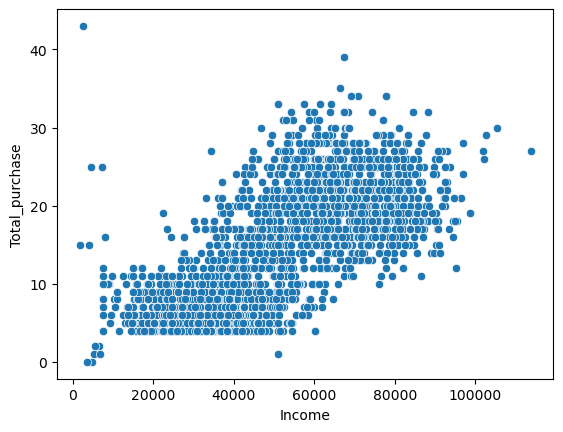

In [92]:
sns.scatterplot(x='Income', y='Total_purchase', data =df_new)
plt.show()

In [93]:
# result : spending is increasing with income but not in all cases

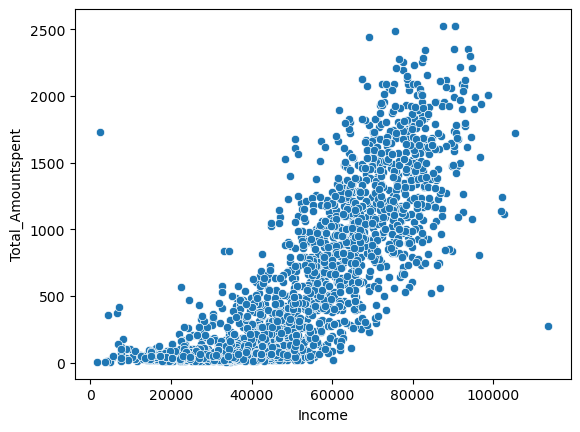

In [94]:
sns.scatterplot(x='Income', y='Total_Amountspent', data =df_new)
plt.show()

In [95]:
#result : Amount spent is increasing with income and at upper extreme we see somewhat exponential increase

In [96]:
## To check relation between web purchases and web visits
y=df.groupby(['NumWebVisitsMonth'])['NumWebPurchases'].count().reset_index()

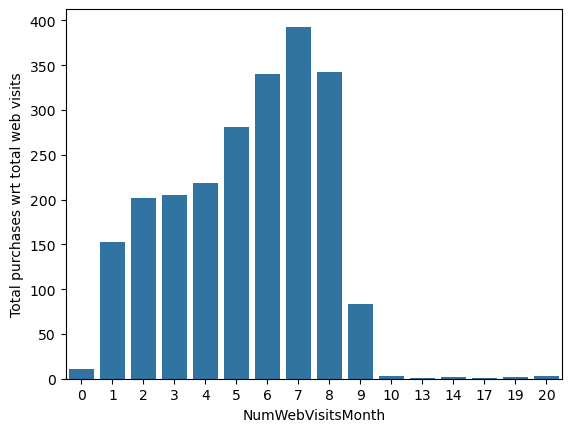

In [97]:
sns.barplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=y)
plt.ylabel('Total purchases wrt total web visits')
plt.show()
## Result shows initially purchases increases with web visits but then decreases
## significantly which shows some customers who visit websites frequently but dont
## make web purchases

In [98]:
#Marketing camapign analysis

In [99]:
## Adding values of each campaign columns to determine performance of each campaign
Total_Purchase_camp = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().reset_index()

In [100]:
sorted_camp=Total_Purchase_camp.sort_values(0)
sorted_camp.columns = ['campaign name', 'Offer_accepted_counts']
sorted_camp
# result shows campaign 2 is least successfull and response is most successfull

,campaign name,Offer_accepted_counts
1,AcceptedCmp2,30
0,AcceptedCmp1,144
2,AcceptedCmp3,163
4,AcceptedCmp5,163
3,AcceptedCmp4,167
5,Response,334


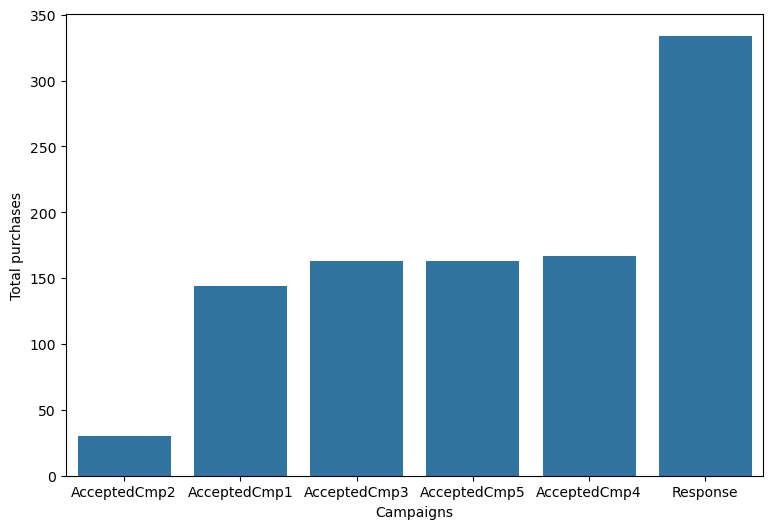

In [101]:
plt.figure(figsize=(9,6))
sns.barplot(x='campaign name',y='Offer_accepted_counts', data =sorted_camp, order= sorted_camp['campaign name'].values)
plt.xlabel('Campaigns')
plt.ylabel('Total purchases')
plt.show()
## campaign successfull count plot

In [102]:
## To check response from each country in latest camapign
Country_Response = df.groupby(['Country'])['Response'].sum().reset_index().sort_values('Response')

In [103]:
Country_Response
### result : middle east lowest and SP is most successfull

,Country,Response
4,ME,2
3,IND,13
7,US,13
2,GER,17
0,AUS,23
1,CA,38
5,SA,52
6,SP,176


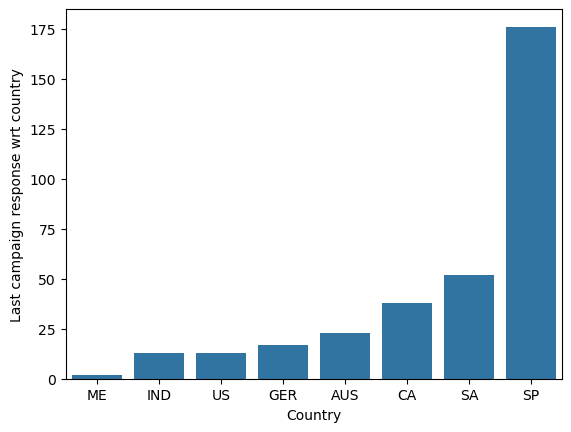

In [104]:
sns.barplot(y='Response', x='Country', data=Country_Response)
plt.ylabel('Last campaign response wrt country')
plt.show()
## campaign performance by each country/ region

In [105]:
Complains= df.groupby(['Age_Category'])['Complain'].mean().reset_index().sort_values('Complain')

C:\Users\Superuser\AppData\Local\Temp\ipykernel_10336\1041577850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Complains= df.groupby(['Age_Category'])['Complain'].mean().reset_index().sort_values('Complain')


In [106]:
Complains
# Average complains by each age category

,Age_Category,Complain
2,Baby_Boomers,0.007937
0,Millennials,0.009050
1,Generation X,0.009238
3,Silent Generation,0.105263


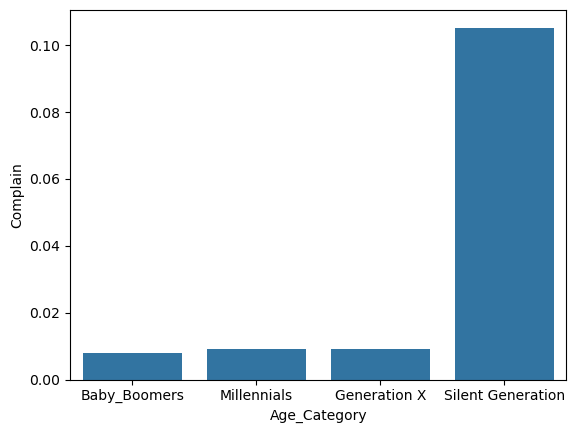

In [107]:
sns.barplot(x='Age_Category', y='Complain', data = Complains, order =Complains.Age_Category.values)
plt.show()

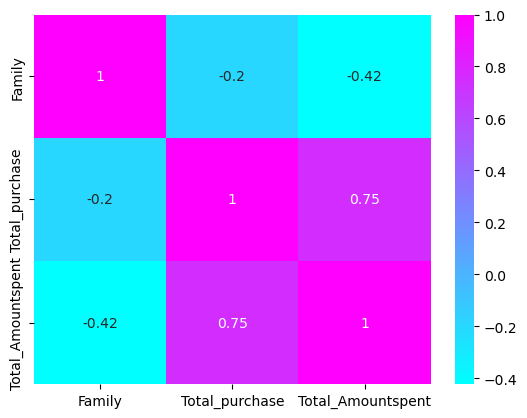

In [108]:
sns.heatmap(df[['Family', 'Total_purchase','Total_Amountspent']].corr(), cmap="cool", annot=True)
plt.show()

# key insights 
1) Number of purchases and Total amount spent are related with income of customers.
2) Total number of purchases and amount spent is highest for age group 54-70, but for average purchases and amount spent two other age groups have higher numbers. 
3) Total number of purchases and amount spent is lowest for ME region but average spending and purchases are highest which shows that potential wise that region is not far behined but company needs to increase customer base.
4) Surprisingly famiy with more members have spent less amount on purchasing almost inverse pattern was observed.